<a href="https://colab.research.google.com/github/Saul-Ochoa/Python-MachineLearning/blob/main/Machine%20learning%20projects/Big_Mart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Variable Description
* ProductID : unique product ID
* Weight : weight of products
* FatContent : specifies whether the product is low on fat or not
* Visibility : percentage of total display area of all products in a store allocated to the particular product
* ProductType : the category to which the product belongs
* MRP : Maximum Retail Price (listed price) of the products
* OutletID : unique store ID
* EstablishmentYear : year of establishment of the outlets
* OutletSize : the size of the store in terms of ground area covered
* LocationType : the type of city in which the store is located
* OutletType : specifies whether the outlet is just a grocery store or some so

* ProductID: identificador único del producto
* Weight: peso del producto
* FatContent: especifica si el producto tiene bajo contenido de grasa o no
* Visibility: porcentaje del área de exhibición total de todos los productos en una tienda asignada al producto en particular
* ProductType: la categoría a la que pertenece el producto
* MRP: Precio máximo de venta al público (precio listado) de los productos
* OutletID: identificador único de la tienda
* EstablishmentYear: año de establecimiento de las tiendas
* OutletSize: el tamaño de la tienda en términos de área cubierta en el suelo
* LocationType: el tipo de ciudad en la que se encuentra la tienda
* OutletType: especifica si la tienda es solo una tienda de comestibles o algún tipo de supermercado
* OutletSales: (variable objetivo) ventas del producto en la tienda en particular

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
def model(model,X_train,y_train,X_test, y_test):
  model.fit(X_train, y_train)
  lr_normal_score_train = model.score(X_train, y_train)
  lr_normal_score_test = model.score(X_test, y_test)
  previsoes = model.predict(X_test)
  mae_lr_normal = mean_absolute_error(y_test, previsoes)
  rmse_lr_normal = np.sqrt(mean_squared_error(y_test, previsoes))
  print('Train :', lr_normal_score_train)
  print('Test :', lr_normal_score_test)
  print('Mean Absolute Error :', mae_lr_normal)
  print('Root Mean Square Error :', rmse_lr_normal)
  print('-----------------------------------------------')  

In [3]:
train_set='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/Machine%20learning%20projects/Data/Train-Set.csv'
test_set='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/Machine%20learning%20projects/Data/Test-Set.csv'

In [4]:
train=pd.read_csv(train_set,sep=',')
test=pd.read_csv(test_set,sep=',')

In [5]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          5681 non-null   object 
 1   Weight             4705 non-null   float64
 2   FatContent         5681 non-null   object 
 3   ProductVisibility  5681 non-null   float64
 4   ProductType        5681 non-null   object 
 5   MRP                5681 non-null   float64
 6   OutletID           5681 non-null   object 
 7   EstablishmentYear  5681 non-null   int64  
 8   OutletSize         4075 non-null   object 
 9   LocationType       5681 non-null   object 
 10  OutletType         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
train.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
test.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [10]:
train.select_dtypes(include='object').nunique()

ProductID       1559
FatContent         5
ProductType       16
OutletID          10
OutletSize         3
LocationType       3
OutletType         4
dtype: int64

In [11]:
test.select_dtypes(include='object').nunique()

ProductID       1543
FatContent         5
ProductType       16
OutletID          10
OutletSize         3
LocationType       3
OutletType         4
dtype: int64

In [12]:
train.select_dtypes(include='object').columns

Index(['ProductID', 'FatContent', 'ProductType', 'OutletID', 'OutletSize',
       'LocationType', 'OutletType'],
      dtype='object')

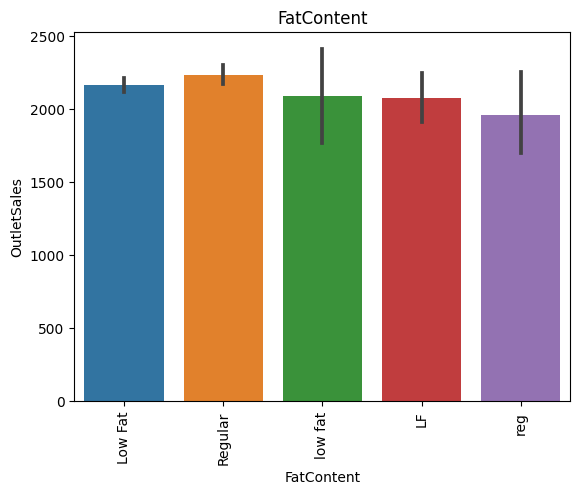

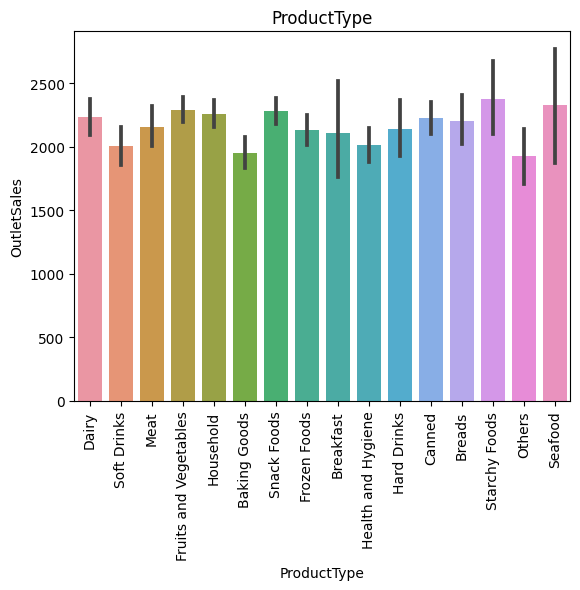

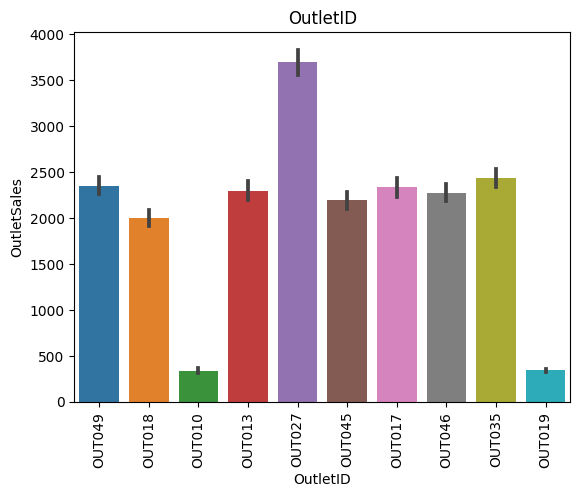

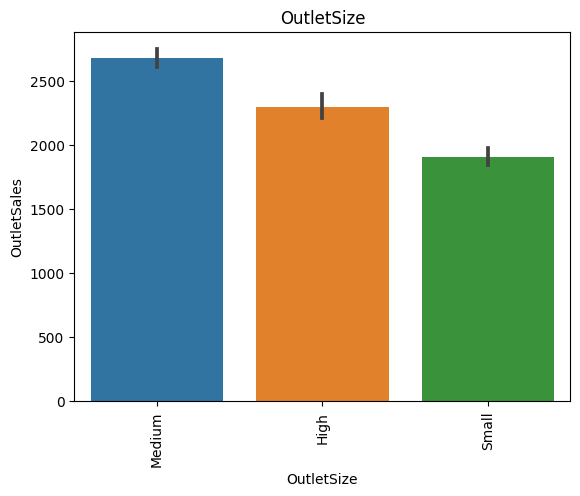

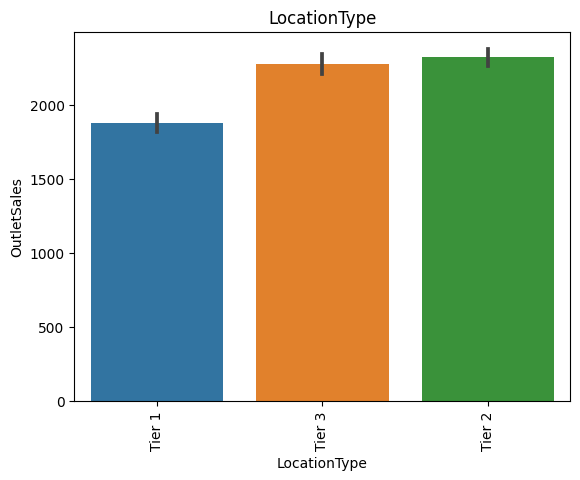

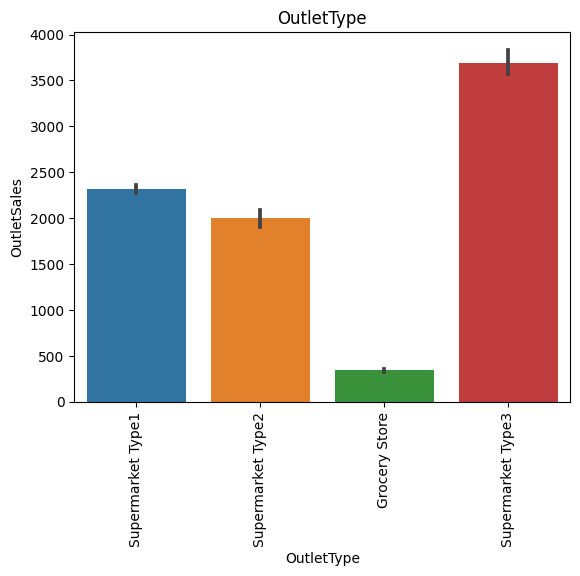

In [13]:
cat_vars=['FatContent', 'ProductType', 'OutletID', 'OutletSize', 'LocationType',
       'OutletType']
for i in cat_vars:
  sns.barplot(data=train,x=i,y='OutletSales')
  plt.xticks(rotation=90)
  plt.title(i)
  plt.show()

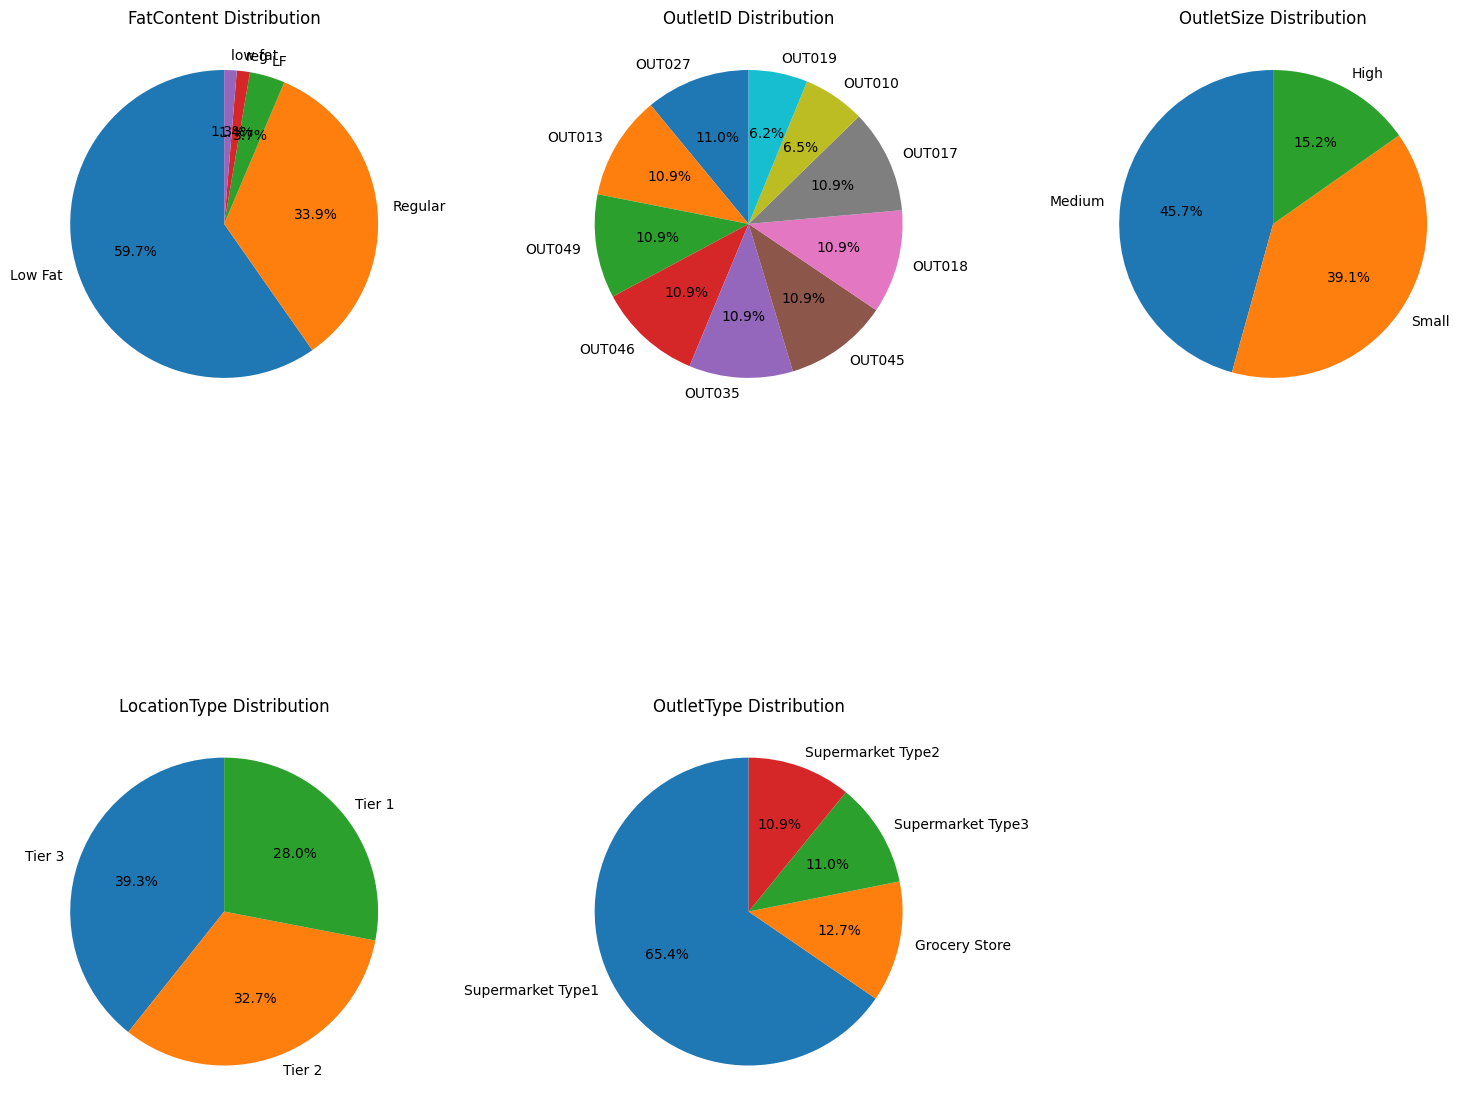

In [14]:
cat_vars=['FatContent','OutletID', 'OutletSize', 'LocationType',
       'OutletType']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = train[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')


fig.tight_layout()
fig.delaxes(axs[1][2])
plt.show()

In [15]:
train.select_dtypes(include='number').columns

Index(['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear',
       'OutletSales'],
      dtype='object')

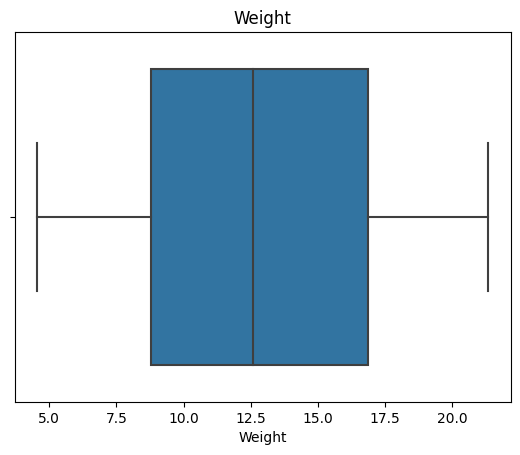

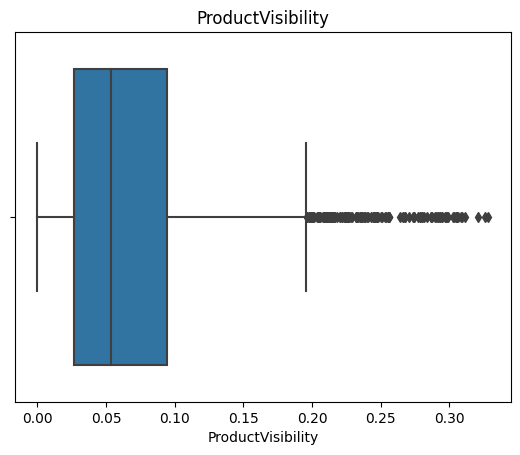

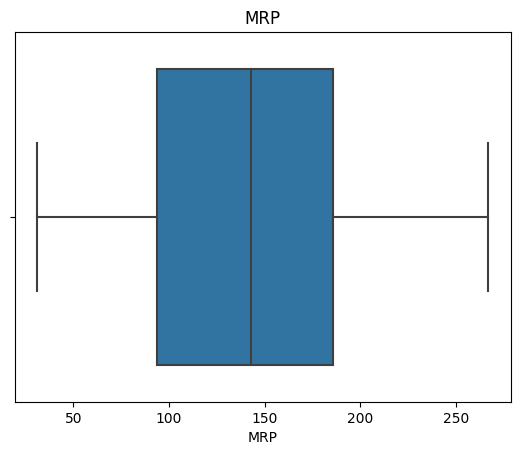

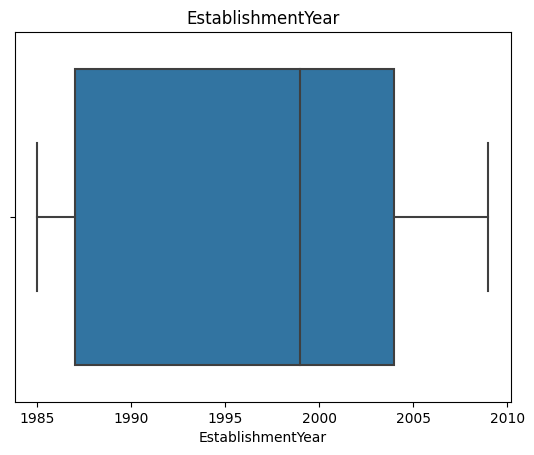

In [16]:
num_vars=['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear']
for i in num_vars:
  sns.boxplot(data=train,x=i)
  plt.title(i)
  plt.show()


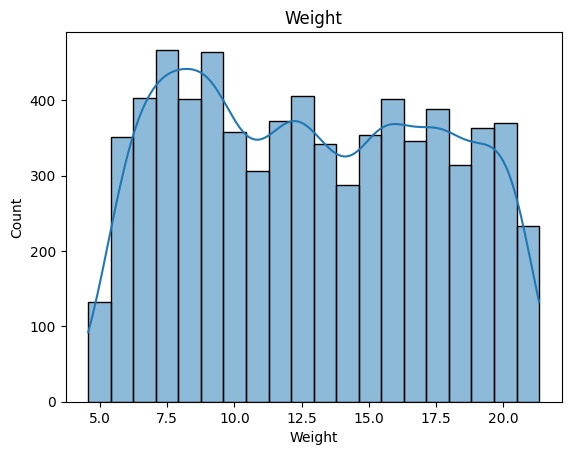

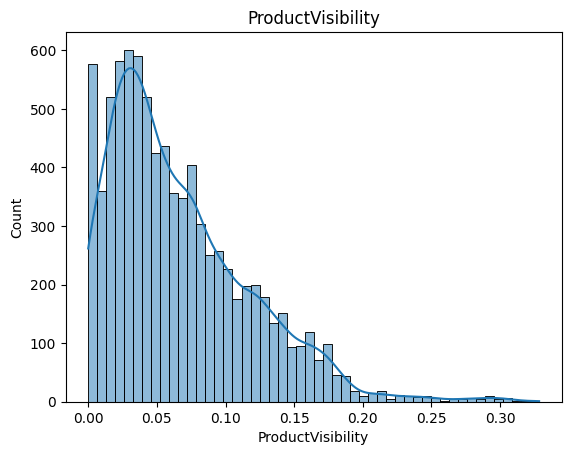

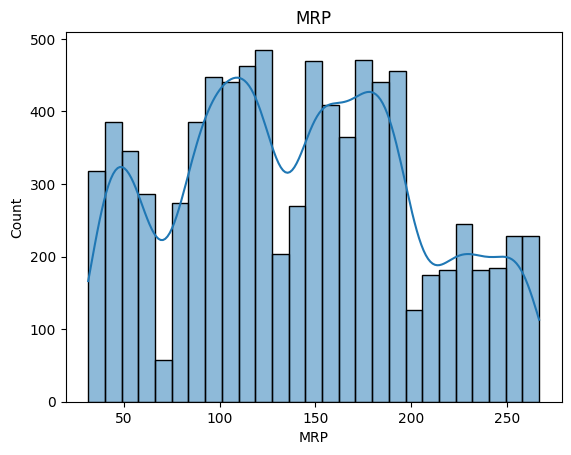

In [17]:
num_vars=['Weight', 'ProductVisibility', 'MRP']
for i in num_vars:
  sns.histplot(data=train,x=i,kde=True)
  plt.title(i)
  plt.show()

In [18]:
train.drop(columns='ProductID',inplace=True)
test.drop(columns='ProductID',inplace=True)

In [19]:
train.columns

Index(['Weight', 'FatContent', 'ProductVisibility', 'ProductType', 'MRP',
       'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

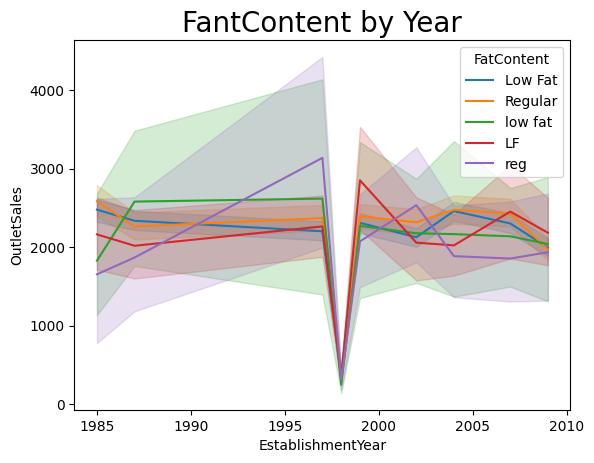

In [20]:
#ventas por años
sns.lineplot(data=train,x='EstablishmentYear',y='OutletSales',hue='FatContent')
plt.title('FantContent by Year',fontsize=20)
plt.show()

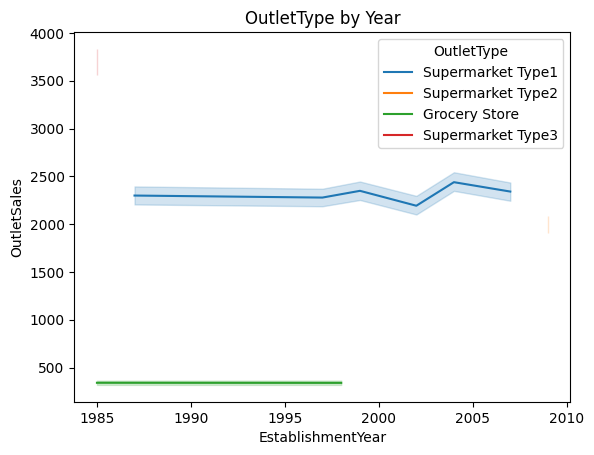

In [21]:
sns.lineplot(data=train,x='EstablishmentYear',y='OutletSales',hue='OutletType')
plt.title('OutletType by Year')
plt.show()

# Data Preprocessing

In [22]:
import missingno as msno

In [23]:
print(train.isnull().sum())
print('                 ')
print(test.isnull().sum())

Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64
                 
Weight                976
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64


In [24]:
print(train.isnull().sum().sum())

3873


In [25]:
print(test.isnull().sum().sum())

2582


<Axes: >

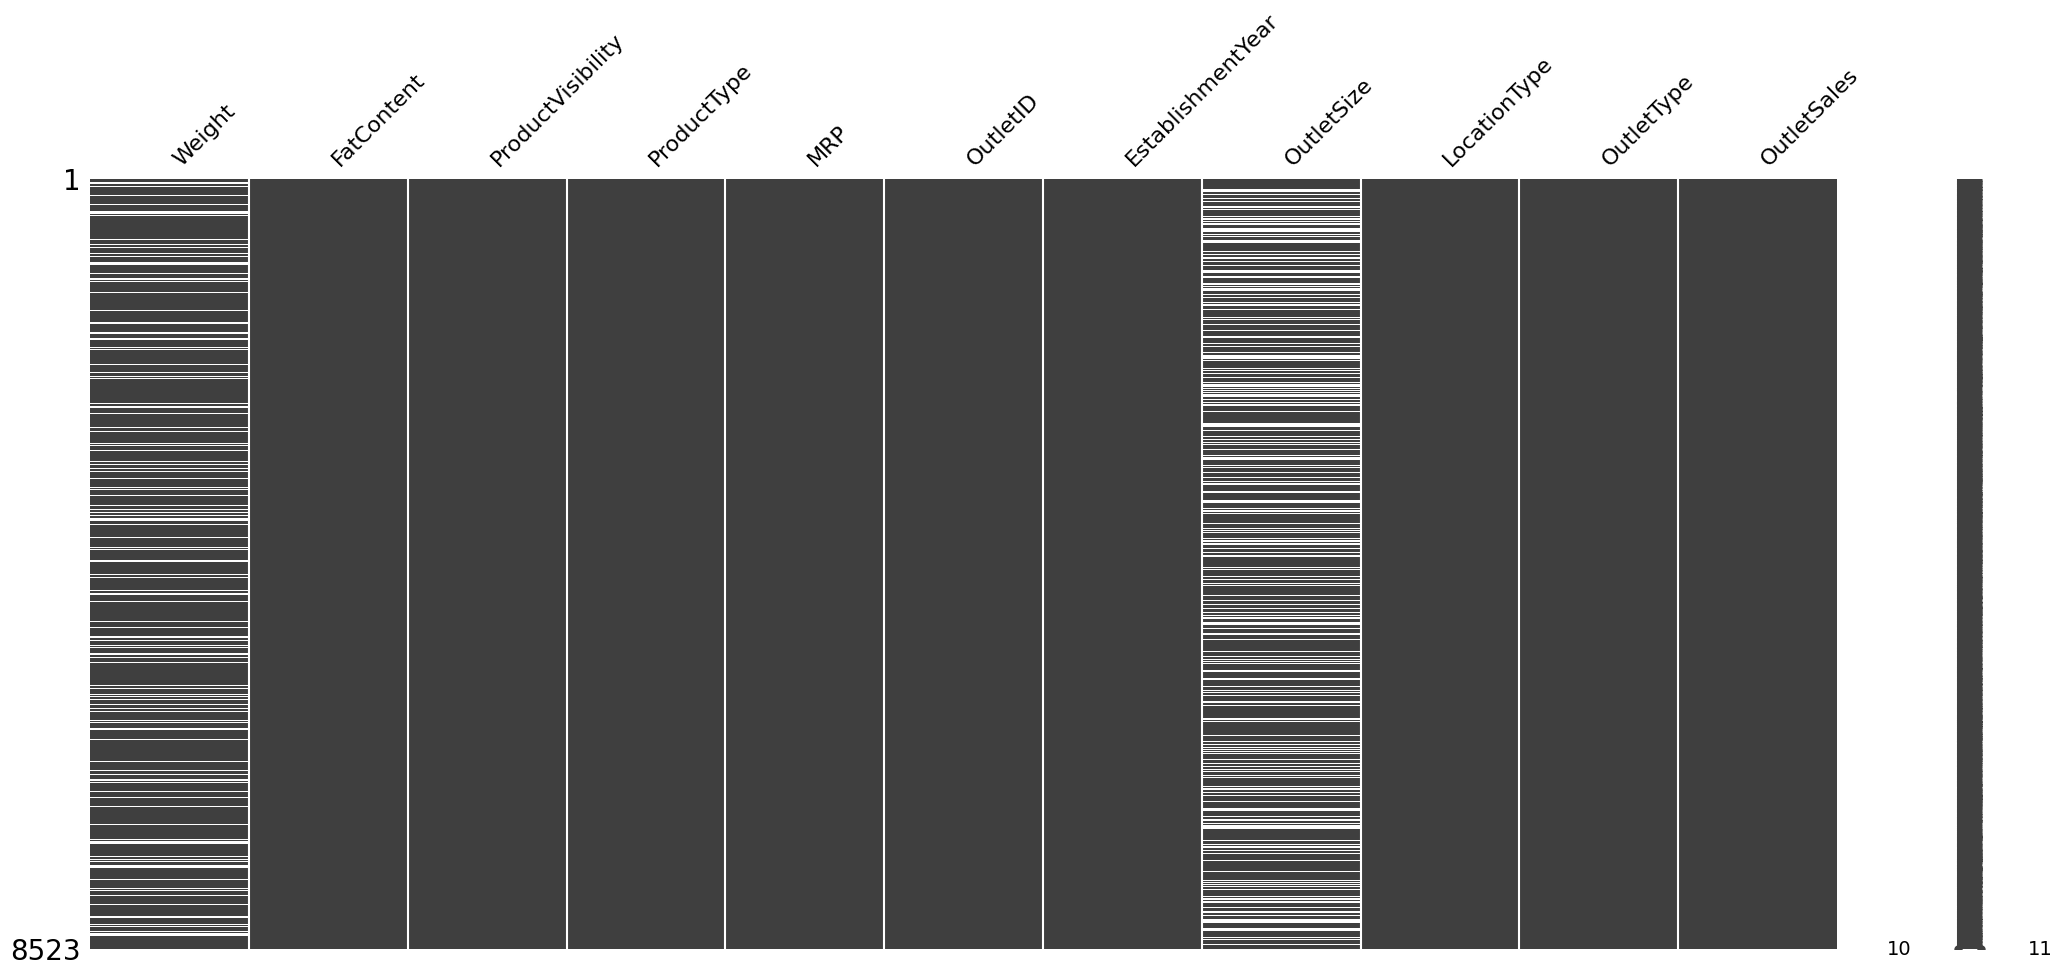

In [26]:
msno.matrix(train)

<Axes: >

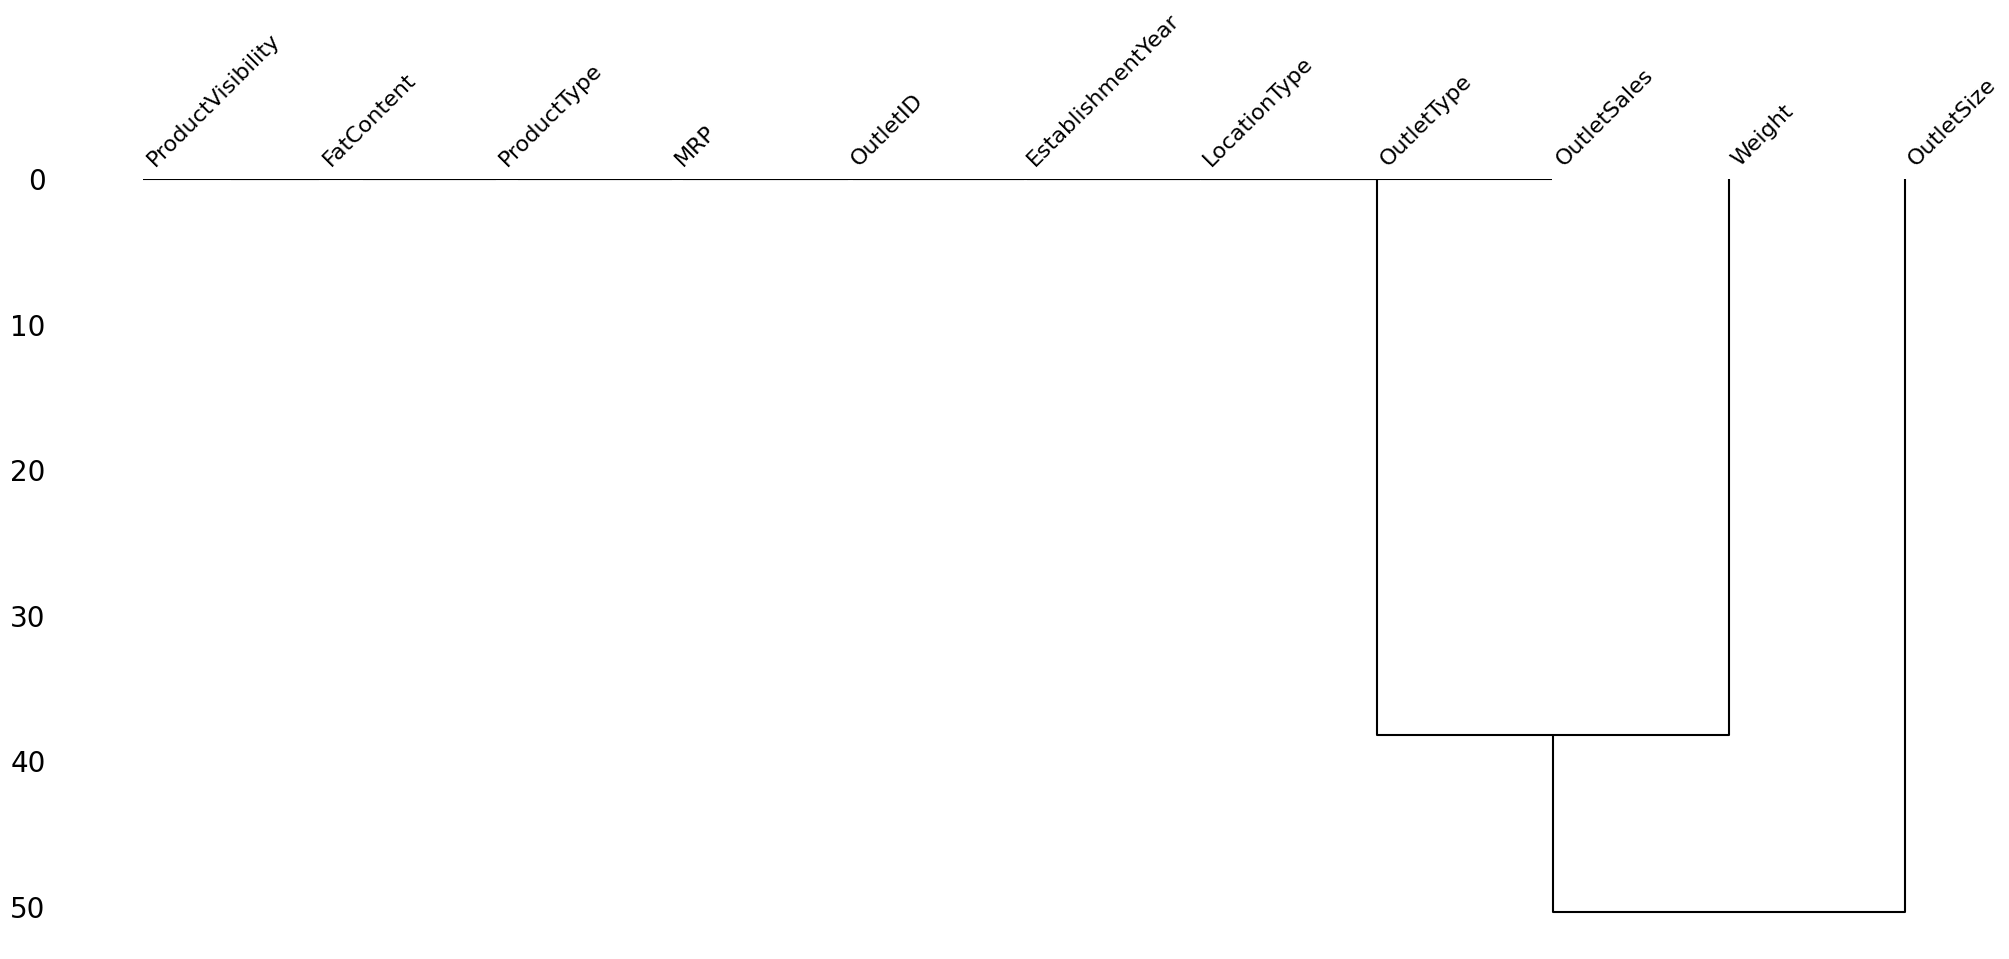

In [27]:
msno.dendrogram(train)

In [28]:
train.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
train.isnull().mean()

Weight               0.171653
FatContent           0.000000
ProductVisibility    0.000000
ProductType          0.000000
MRP                  0.000000
OutletID             0.000000
EstablishmentYear    0.000000
OutletSize           0.282764
LocationType         0.000000
OutletType           0.000000
OutletSales          0.000000
dtype: float64

**OutletSize**

In [30]:
train['OutletSize'].value_counts()

Medium    2793
Small     2388
High       932
Name: OutletSize, dtype: int64

In [31]:
# filling with most common class
train=train.apply(lambda x:x.fillna(x.value_counts().index[0]))
train.isnull().sum()

Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [32]:
#filling with most comon class
test=test.apply(lambda x:x.fillna(x.value_counts().index[0]))
test.isnull().sum()

Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
dtype: int64

**Weight**

In [33]:
mean_value=train['Weight'].mean()
mean_value

12.736175642379445

In [34]:
mean_value_test=test['Weight'].mean()
mean_value_test

12.318421932758318

In [35]:
# Reemplazar los valores faltantes de la columna weight con la media
train['Weight'].fillna(mean_value,inplace=True)
test['Weight'].fillna(mean_value_test,inplace=True)

In [36]:
train.isnull().sum()

Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [37]:
test.isnull().sum()

Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
dtype: int64

**Outlier**

In [38]:
Q1=train['ProductVisibility'].quantile(0.25)
Q2=train['ProductVisibility'].quantile(0.75)
IQR=Q2-Q1
limit_inf=Q1-1.5*IQR
limit_sup=Q2+1.5*IQR
train=train[(train['ProductVisibility']>=limit_inf) & (train['ProductVisibility']<=limit_sup)]
train.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
Q1=test['ProductVisibility'].quantile(0.25)
Q2=test['ProductVisibility'].quantile(0.75)
IQR=Q2-Q1
limit_inf=Q1-1.5*IQR
limit_sup=Q2+1.5*IQR

test=test[(test['ProductVisibility']>=limit_inf) & (test['ProductVisibility']<=limit_sup)]
test.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,10.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**Label Encoding**

**Train**

In [40]:
for col in train.select_dtypes(include=['object']).columns:
  print(f"{col}: {train[col].unique()}")

FatContent: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
ProductType: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
OutletID: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
OutletSize: ['Medium' 'High' 'Small']
LocationType: ['Tier 1' 'Tier 3' 'Tier 2']
OutletType: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [41]:
from sklearn import preprocessing
for col in train.select_dtypes(include=['object']).columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(train[col].unique())
  train[col]=label_encoder.transform(train[col])
  print(f"{col}: {train[col].unique()}")

FatContent: [1 2 3 0 4]
ProductType: [ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
OutletID: [9 3 0 1 5 7 2 8 6 4]
OutletSize: [1 0 2]
LocationType: [0 2 1]
OutletType: [1 2 0 3]


**Test**

In [42]:
for col in test.select_dtypes(include=['object']).columns:
  print(f"{col}: {test[col].unique()}")

FatContent: ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
ProductType: ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
OutletID: ['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']
OutletSize: ['Medium' 'Small' 'High']
LocationType: ['Tier 1' 'Tier 2' 'Tier 3']
OutletType: ['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


In [43]:
for col in test.select_dtypes(include=['object']).columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(test[col].unique())
  test[col]=label_encoder.transform(test[col])
  print(f"{col}: {test[col].unique()}")

FatContent: [1 4 2 0 3]
ProductType: [13  4 11  6  0  8  1  7 12 14  9  5 10  3 15  2]
OutletID: [9 2 0 5 8 3 7 4 1 6]
OutletSize: [1 2 0]
LocationType: [0 1 2]
OutletType: [1 0 3 2]


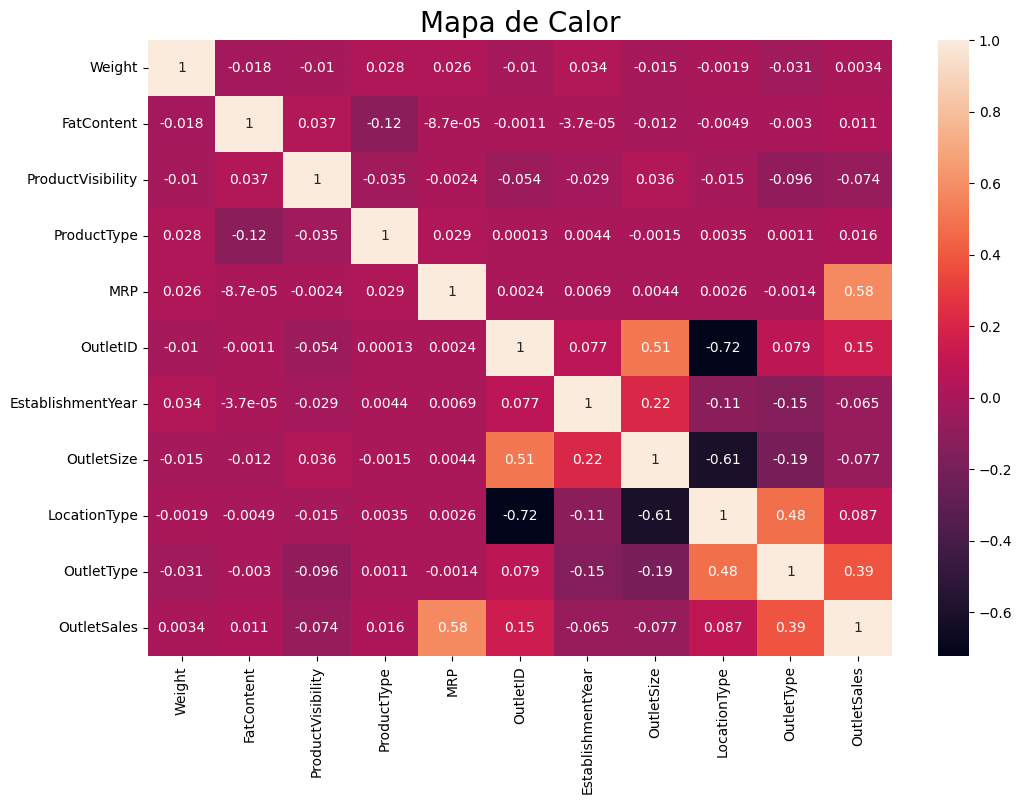

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),fmt='.2g',annot=True)
plt.title("Mapa de Calor", fontsize=20)
plt.show()

# Train Test Split

In [45]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [46]:
train.head()  #weight  #outletsize

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [47]:
test.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,8.300,4,0.038428,4,87.3198,2,2007,1,1,1
2,14.600,1,0.099575,11,241.7538,0,1998,1,2,0
3,7.315,1,0.015388,13,155.0340,2,2007,1,1,1
4,10.500,2,0.118599,4,234.2300,5,1985,1,2,3


In [48]:
df_train=train.copy()
df_test=test.copy()

In [49]:
print(df_train.shape)
print(df_test.shape)

(8379, 11)
(5568, 10)


In [50]:
X=df_train.drop('OutletSales',axis=1)
y=df_train['OutletSales']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=45)

# Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#Create a DecisionTreeRegressor
dtree = DecisionTreeRegressor()
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state':[0,45,100],
    'criterion':['poisson']
}
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 100}

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=100, max_depth=6, max_features='auto', min_samples_leaf=1, min_samples_split=2,criterion='poisson')
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=6, max_features='auto',
                      random_state=100)

In [54]:
model(dtree,X_train,y_train,X_test, y_test)

Train : 0.6058786867577887
Test : 0.5828827972875112
Mean Absolute Error : 766.2644147013297
Root Mean Square Error : 1088.6386421755753
-----------------------------------------------


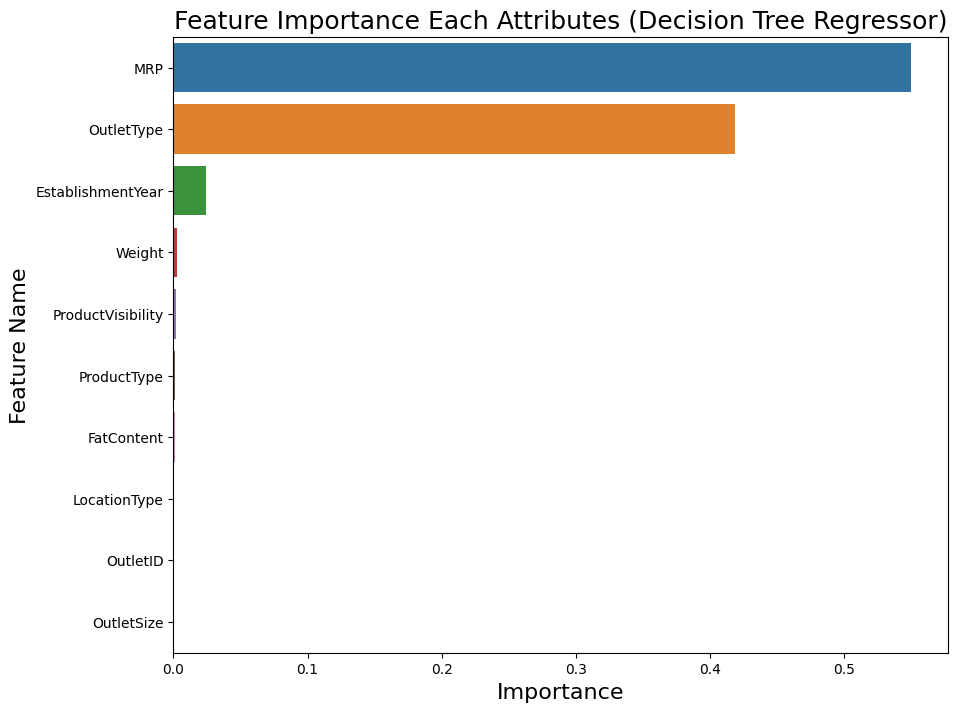

In [55]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [93]:
predicciones_dtree=dtree.predict(test)
predicciones_dtree

array([1643.344205  , 1394.70704324,  569.39441695, ..., 1899.0628306 ,
       3199.70666491, 1237.246153  ])

In [94]:
df_dtree = pd.DataFrame({'OutletSales_dtree': predicciones_dtree})

In [95]:
test_dtree = pd.concat([test, df_dtree], axis=1)
test_dtree.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales_dtree
0,20.750,1.0,0.007565,13.0,107.8622,9.0,1999.0,1.0,0.0,1.0,1643.344205
1,8.300,4.0,0.038428,4.0,87.3198,2.0,2007.0,1.0,1.0,1.0,1394.707043
2,14.600,1.0,0.099575,11.0,241.7538,0.0,1998.0,1.0,2.0,0.0,569.394417
3,7.315,1.0,0.015388,13.0,155.0340,2.0,2007.0,1.0,1.0,1.0,2507.404764
4,10.500,2.0,0.118599,4.0,234.2300,5.0,1985.0,1.0,2.0,3.0,6495.077155


# Random ForestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [57]:
rf = RandomForestRegressor()

In [58]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'criterion':['squared_error']
}


In [59]:
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

In [60]:
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [62]:
rf = RandomForestRegressor(random_state=100, max_depth=5, max_features='auto', min_samples_leaf=4, min_samples_split=2,criterion='squared_error')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=4,
                      random_state=100)

In [63]:
model(rf,X_train,y_train,X_test, y_test)

Train : 0.6038832339381754
Test : 0.5868453225402166
Mean Absolute Error : 764.2842078905834
Root Mean Square Error : 1083.4553843485219
-----------------------------------------------


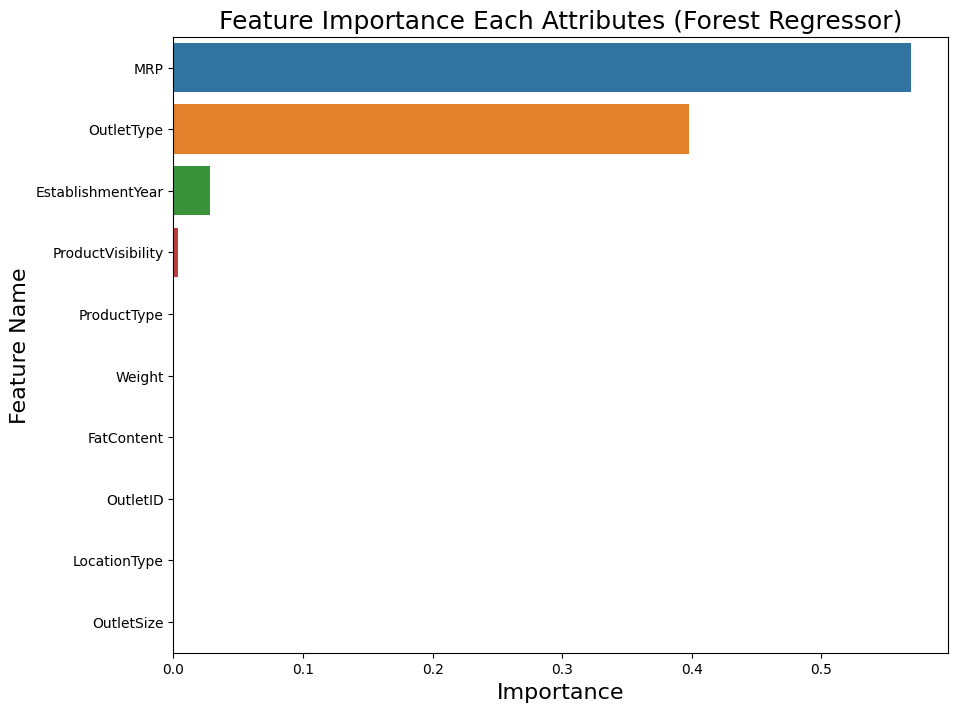

In [65]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rf.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [89]:
predicciones_rfc=rf.predict(test)
predicciones_rfc

array([1592.39502391, 1457.5841989 ,  560.75290854, ..., 1963.31541095,
       3643.64515729, 1245.78912165])

In [90]:
df_rfc = pd.DataFrame({'OutletSales_rfc': predicciones_rfc})

In [91]:
test_rfc = pd.concat([test, df_rfc], axis=1)

In [92]:
test_rfc.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales_rfc
0,20.750,1.0,0.007565,13.0,107.8622,9.0,1999.0,1.0,0.0,1.0,1592.395024
1,8.300,4.0,0.038428,4.0,87.3198,2.0,2007.0,1.0,1.0,1.0,1457.584199
2,14.600,1.0,0.099575,11.0,241.7538,0.0,1998.0,1.0,2.0,0.0,560.752909
3,7.315,1.0,0.015388,13.0,155.0340,2.0,2007.0,1.0,1.0,1.0,2499.420567
4,10.500,2.0,0.118599,4.0,234.2300,5.0,1985.0,1.0,2.0,3.0,6300.264831


# XGBoost Regressor

In [74]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [75]:
xgb=XGBRegressor()

In [76]:
param_grid={
    'max_depth':[3,5,7,9,11,15],
    'min_child_weight':[1,2,3,4,5],
    'learning_rate':[0.1,0.01,0.001,0.0001],
    'gamma':[0,1,2,3,4,5],
    'n_estimators':[10,20,50,100]
}

In [77]:
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2')

In [78]:
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50}


In [79]:
xgb = XGBRegressor(gamma= 0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [80]:
model(xgb,X_train,y_train,X_test, y_test)

Train : 0.6108137921796679
Test : 0.5928545186962537
Mean Absolute Error : 759.2697046111003
Root Mean Square Error : 1075.5472763136208
-----------------------------------------------


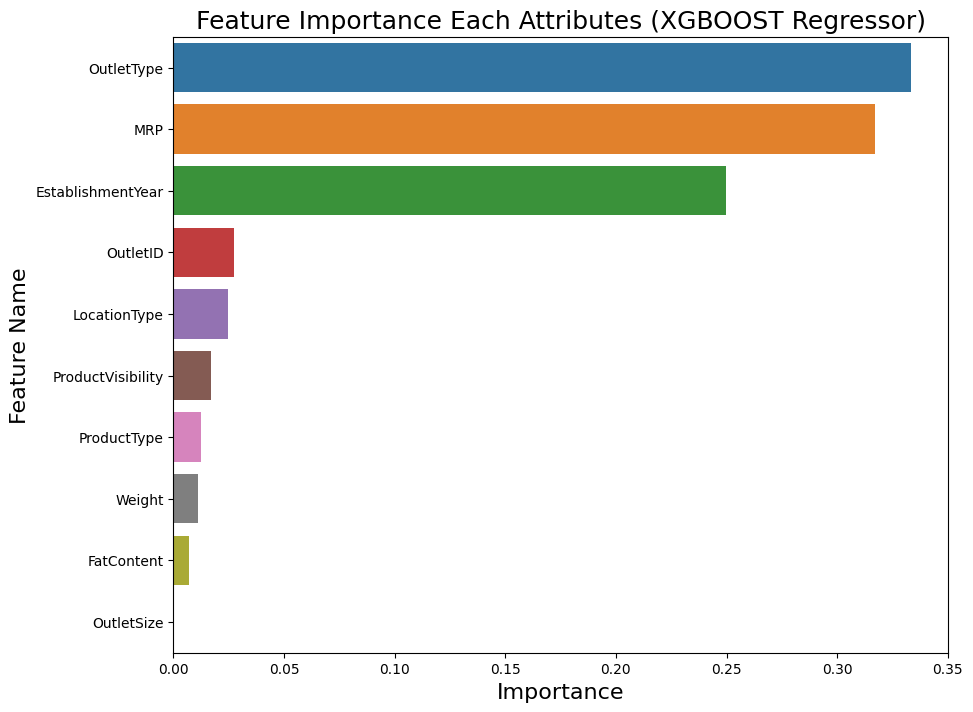

In [82]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": xgb.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (XGBOOST Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [96]:
predicciones_xgb=xgb.predict(test)
predicciones_xgb

array([1611.0695 , 1385.0222 ,  446.69238, ..., 1885.0415 , 3530.2373 ,
       1294.8262 ], dtype=float32)

In [97]:
df_xgb = pd.DataFrame({'OutletSales_xgb': predicciones_xgb})

In [98]:
test_xgb = pd.concat([test, df_xgb], axis=1)
test_xgb.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales_xgb
0,20.750,1.0,0.007565,13.0,107.8622,9.0,1999.0,1.0,0.0,1.0,1611.069458
1,8.300,4.0,0.038428,4.0,87.3198,2.0,2007.0,1.0,1.0,1.0,1385.022217
2,14.600,1.0,0.099575,11.0,241.7538,0.0,1998.0,1.0,2.0,0.0,446.692383
3,7.315,1.0,0.015388,13.0,155.0340,2.0,2007.0,1.0,1.0,1.0,2499.517578
4,10.500,2.0,0.118599,4.0,234.2300,5.0,1985.0,1.0,2.0,3.0,6023.361816
